# Flight Planning

## Problem Description

- An airline has limited aircraft hours and wants to decide how many flights to schedule on two routes: A and B.

- Profit Information:\
    Route A: Profit=50k, hours=2 \
    Route B: Profit=40k, hours=1

- Constraints:\
    Total flight hours=8\
    Total number of flights=5

- Decision Variables:\
    x = number of flights on Route A\
    y = number of flights on Route B
    

## Mathematical formulation

Target function:\
$profit=50x+40y$
$$argmax_{x,y} profit$$

Linear constraints:
- $x>=0$
- $y>=0$
- $2x+y<=8$
- $x+y<=5$

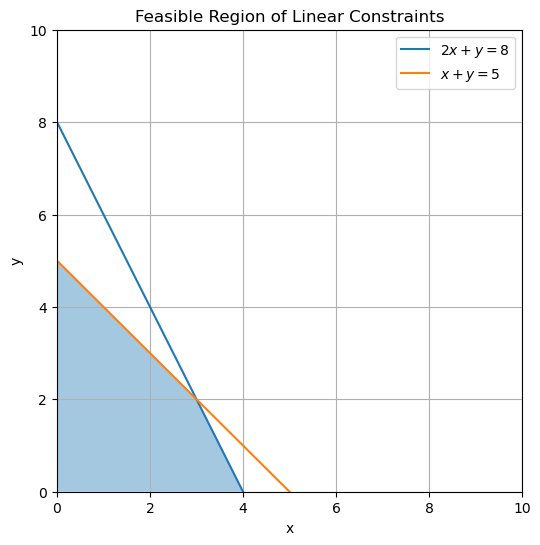

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(0, 6, 400)

# Constraint lines
y1 = 8 - 2*x      # 2x + y = 8
y2 = 5 - x        # x + y = 5

# Feasible region is below both lines and above y=0
y_feasible = np.minimum(y1, y2)
y_feasible = np.maximum(y_feasible, 0)

plt.figure(figsize=(6, 6))

# Plot constraints
plt.plot(x, y1, label=r'$2x + y = 8$')
plt.plot(x, y2, label=r'$x + y = 5$')
#plt.axhline(0, label=r'$y = 0$')
#plt.axvline(0, label=r'$x = 0$')

# Shade feasible region
plt.fill_between(x, 0, y_feasible, where=(y_feasible >= 0), alpha=0.4)

# Labels and formatting
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region of Linear Constraints')
plt.legend()
plt.grid(True)

plt.show()

Another requierment: x and y are integers!

In [12]:
import numpy as np
from scipy.optimize import milp, LinearConstraint, Bounds

# Objective (minimize -50x -40y)
c = [-50, -40]

# Constraints
A = [[2, 1], # the coefficients for the first inequality
     [1, 1]] # the coefficients for the second inequality
b = [8, 5]

constraints = LinearConstraint(A, -np.inf, b)

# Variable bounds
bounds = Bounds([0, 0], [np.inf, np.inf])

integrality = [1, 1] # both variable are integers

# Solve
res = milp(c=c,
           constraints=constraints,
           bounds=bounds,
           integrality=integrality)

best_point=res.x
best_profit=-res.fun
print("The optimized selection is: x=",best_point[0], 'y=',best_point[1])
print("Optimized profit =", best_profit,'k')


The optimized selection is: x= 3.0 y= 2.0
Optimized profit = 230.0 k
